<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/Comprehensive_Evaluation_%26_Decision_Making_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

评价方法大体上可分为两类,其主要区别在确定权重的方法上。一类是主观赋权法，多数采取综合咨询评分确定权重,如综合指数法、模糊综合评判法、层次分析法、功效系数法等。另一类是客观赋权法,根据各指标间相关关系或各指标值变异程度来确定权数,如主成分分析法、因子分析法、理想解法(也称TOPSIS法)等。目前国内外综合评价方法有数十种之多,其中主要使用的评价方法有主成分分析法、因子分析法、TOPSIS法、秩和比法、灰色关联法、嫡权法、层次分析法,模糊评价法、物元分析法、聚类分析法、价值工程法、神经网络法等。本文主要介绍几种常用的方法。

## 理想解法 TOPSIS


设我们有 $n$ 个决策对象，每个对象有 $m$ 个指标（**已事先正向化处理**）。我们将各个指标中最好的数据合并起来得到**正理想解**，最差的数据合并起来得到 **负理想解**，计算每个决策对象到正理想解和负理想解的距离，既靠近正理想解又远离负理想解的就是最好的对象，并且可以据此对各个对象进行排序。


1. 设决策矩阵为 $(a_{ij})_{m \times n}$，即第 $i$ 个对象的第 $j$ 个指标为 $a_{ij}$（**已正向化**），对其进行向量规范化，得到规范化决策矩阵 $(b_{ij})_{m \times n}$

 $$
 b_{ij}={{a_{ij}} \over {\sqrt{\sum\limits_{i=1}^ma_{ij}^2}}}
 $$

2. 构造加权规范化决策矩阵 $(c_{ij})_{m\times n}$
$$
c_{ij}=w_j\cdot b_{ij}
$$

3. 确定正理想解 $C^*$ 和负理想解 $C^0$

   $$
   \begin{cases}
   c^*_j=\max\limits_{i=1}^m c_{ij}&j=1,2,\ldots\\
   c^0_j=\min\limits_{i=1}^m c_{ij}&j=1,2,\ldots
   \end{cases}
   $$


4. 计算各决策对象到正负理想解的距离（欧几里得距离）：

$$
\begin{cases}
d^*_i=||c_i-C^*||_2=\sqrt{\sum\limits_{j=1}^n(c_{ij}-c_j^*)^2}\\
d^0_i=||c_i-C^0||_2=\sqrt{\sum\limits_{j=1}^n(c_{ij}-c_j^0)^2}
\end{cases}
$$
   
   计算综合评价指标：
   
   $$
   f_i=\frac{d_i^0}{d_i^0+d_i^*}
   $$

In [ ]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TOPSIS法(优劣解距离法)介绍及 python3 实现 - Suranyi的文章 - 知乎
https://zhuanlan.zhihu.com/p/37738503

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.DataFrame(
    {'人均专著': [0.1, 0.2, 0.4, 0.9, 1.2], '生师比': [5, 6, 7, 10, 2], '科研经费': [5000, 6000, 7000, 10000, 400],
     '逾期毕业率': [4.7, 5.6, 6.7, 2.3, 1.8]}, index=['院校' + i for i in list('ABCDE')])

In [ ]:
data

,人均专著,生师比,科研经费,逾期毕业率
院校A,0.1,5,5000,4.7
院校B,0.2,6,6000,5.6
院校C,0.4,7,7000,6.7
院校D,0.9,10,10000,2.3
院校E,1.2,2,400,1.8


In [ ]:
data.sum()

人均专著         2.8
生师比         30.0
科研经费     28400.0
逾期毕业率       21.1
dtype: float64

In [ ]:
def dataDirection_1(datas, offset=0):
	def normalization(data):
		return 1 / (data + offset)

	return list(map(normalization, datas))


def dataDirection_2(datas, x_min, x_max):
	def normalization(data):
		if data <= x_min or data >= x_max:
			return 0
		elif data > x_min and data < (x_min + x_max) / 2:
			return 2 * (data - x_min) / (x_max - x_min)
		elif data < x_max and data >= (x_min + x_max) / 2:
			return 2 * (x_max - data) / (x_max - x_min)

	return list(map(normalization, datas))


def dataDirection_3(datas, x_min, x_max, x_minimum, x_maximum):
	def normalization(data):
		if data >= x_min and data <= x_max:
			return 1
		elif data <= x_minimum or data >= x_maximum:
			return 0
		elif data > x_max and data < x_maximum:
			return 1 - (data - x_max) / (x_maximum - x_max)
		elif data < x_min and data > x_minimum:
			return 1 - (x_min - data) / (x_min - x_minimum)

	return list(map(normalization, datas))

In [ ]:
def entropyWeight(data):
	data = np.array(data)
	# 归一化
	P = data / data.sum(axis=0)

	# 计算熵值
	E = np.nansum(-P * np.log(P) / np.log(len(data)), axis=0)

	# 计算权系数
	return (1 - E) / (1 - E).sum()
 
def topsis(data, weight=None):
	# 归一化
	data = data / np.sqrt((data ** 2).sum())

	# 最优最劣方案
	Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])

	# 距离
	weight = entropyWeight(data) if weight is None else np.array(weight)
	Result = data.copy()
	Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1)) # 用loc取行
	Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))

	# 综合得分指数
	Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
	Result['排序'] = Result.rank(ascending=False)['综合得分指数']

	return Result, Z, weight

In [ ]:
data['生师比'] = dataDirection_3(data['生师比'], 5, 6, 2, 12)   # 师生比数据为区间型指标
data['逾期毕业率'] = 1 / data['逾期毕业率']   # 逾期毕业率为极小型指标

out,Z,_ = topsis(data, weight=[0.2, 0.3, 0.4, 0.1])    # 设置权系数

In [ ]:
out

,人均专著,生师比,科研经费,逾期毕业率,正理想解,负理想解,综合得分指数,排序
院校A,0.063758,0.597022,0.344901,0.275343,0.406984,0.384552,0.485830,4.0
院校B,0.127515,0.597022,0.413882,0.231092,0.368177,0.409360,0.526483,3.0
院校C,0.255031,0.497519,0.482862,0.193151,0.315879,0.405565,0.562158,2.0
院校D,0.573819,0.199007,0.689803,0.562658,0.239342,0.502968,0.677571,1.0
院校E,0.765092,0.000000,0.027592,0.718952,0.531357,0.354994,0.400512,5.0


In [ ]:
Z

,人均专著,生师比,科研经费,逾期毕业率
负理想解,0.063758,0.000000,0.027592,0.193151
正理想解,0.765092,0.597022,0.689803,0.718952


In [ ]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-07-27 05:27:12--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  17.0MB/s    in 0.6s    

2022-07-27 05:27:12 (17.0 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 69.9MB/s]


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

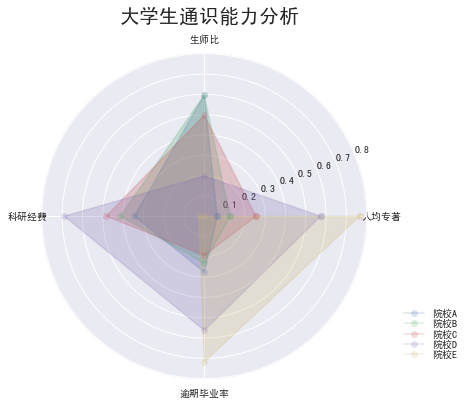

In [ ]:
dataset = out.drop(['负理想解','正理想解','综合得分指数','排序'], axis=1)
radar_labels=dataset.columns
nAttr=4
data=dataset.values.T #数据值
data_labels=dataset.index
# 设置角度
angles=np.linspace(0,2*np.pi,nAttr,
                   endpoint= False)
data=np.concatenate((data, [data[0]])) 
angles=np.concatenate((angles, [angles[0]]))
# 设置画布
fig=plt.figure(facecolor="white",figsize=(10,6))
plt.subplot(111, polar=True)
# 绘图
plt.plot(angles,data,'o-',
         linewidth=1.5, alpha= 0.2)
# 填充颜色
plt.fill(angles,data, alpha=0.25) 
plt.thetagrids(angles[:-1]*180/np.pi, 
               radar_labels,1.2) 
plt.figtext(0.52, 0.95,'大学生通识能力分析', 
            ha='center', size=20)
# 设置图例
legend=plt.legend(data_labels, 
                  loc=(1.1, 0.05),
                  labelspacing=0.1)
plt.setp(legend.get_texts(), ) 
plt.grid(True)
# plt.savefig('tongshi.png')
plt.show()

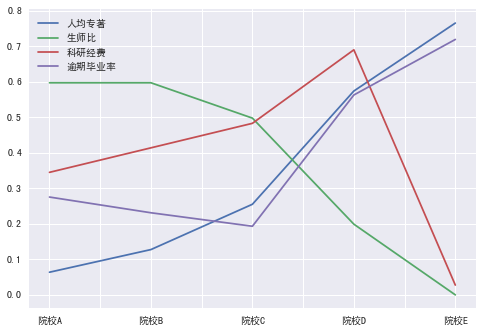

In [ ]:
dataset.plot()

## 层次分析法

层次分析法原理及计算过程详解 - 子木的文章 - 知乎
https://zhuanlan.zhihu.com/p/266405027

In [ ]:
class AHP:
    def __init__(self, sz_layers, judge_mat) -> None:
        """
        :param sz_layers: number of elements in each layer sz_layers: list[int]
        :param judge_mat: judgement matrices judge_mat: list[list[np.ndarray]]
        """
        self.n_layers = len(sz_layers)
        assert len(judge_mat) == self.n_layers - 1
        for i in range(self.n_layers - 1):
            assert np.stack(judge_mat[i], axis=0).shape == (sz_layers[i+1], sz_layers[i], sz_layers[i])
        for sz in sz_layers:
            assert 1 <= sz <= 10
        self.sz_layers = sz_layers
        self.judge_mat = judge_mat

        self.CI = []
        self.RI = []
        self.RI_table = [None, 0, 0, 0.58, 0.90, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49]
        self.b = []
        self.a = []

    def run(self) -> np.ndarray:
        for i in range(self.n_layers - 1):
            b, CI, RI = [], [], []
            for j in range(self.sz_layers[i+1]):
                mat = self.judge_mat[i][j]
                eigw, eigv = np.linalg.eig(mat)
                eigv, eigw = eigv[:, np.argmax(eigw)], np.max(eigw)
                eigv, eigw = eigv.real, eigw.real
                CI.append((eigw - self.sz_layers[i]) / (self.sz_layers[i] - 1))
                RI.append(self.RI_table[self.sz_layers[i]])
                assert CI[-1] / RI[-1] < 0.10, 'Cannot pass consistency test.'
                b.append(eigv / eigv.sum())
            self.b.append(b)
            self.CI.append(CI)
            self.RI.append(RI)
        self.a.append(np.array([1.0]))
        for i in range(self.n_layers - 2, -1, -1):
            a = []
            for j in range(self.sz_layers[i]):
                a.append(self.a[-1] @ np.vstack(self.b[i])[:, j])
            CR = (self.a[-1] @ np.array(self.CI[i])) / (self.a[-1] @ np.array(self.RI[i]))
            assert CR < 0.10, 'Cannot pass consistency test.'
            self.a.append(np.array(a))
        return self.a[-1]

In [ ]:
import numpy as np

# 把每层的
CB1 = np.array([[1, 1/4, 1/2], [4, 1, 3], [2, 1/3, 1]])
CB2 = np.array([[1, 1/4, 1/5], [4, 1, 1/2], [5, 2, 1]])
CB3 = np.array([[1, 3, 1/3], [1/3, 1, 1/7], [3, 7, 1]])
CB4 = np.array([[1, 1/3, 5], [3, 1, 7], [1/5, 1/7, 1]])
CB5 = np.array([[1, 1, 7], [1, 1, 7], [1/7, 1/7, 1]])
CB6 = np.array([[1, 7, 9], [1/7, 1, 1], [1/9, 1, 1]])
BA = np.array([[1, 1, 1, 4, 1, 1/2],
               [1, 1, 2, 4, 1, 1/2],
               [1, 1/2, 1, 5, 3, 1/2],
               [1/4, 1/4, 1/5, 1, 1/3, 1/3],
               [1, 1, 1/3, 3, 1, 1],
               [2, 2, 2, 3, 3, 1]])
judge_mat = [[CB1, CB2, CB3, CB4, CB5, CB6], [BA]]

solver = AHP([3, 6, 1], judge_mat)
res = solver.run()
res

array([0.3951982 , 0.29962129, 0.30518051])

## 灰色关联分析
https://blog.csdn.net/FontThrone/article/details/80607794

In [ ]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/Comprehensive Evaluation")
!ls

winequality-red.csv


In [ ]:
import pandas as p
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# 从硬盘读取数据进入内存
wine = pd.read_csv("winequality-red.csv",sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 无量纲化
def dimensionlessProcessing(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        MEAN = d.mean()
        newDataFrame[c] = ((d - MEAN) / (MAX - MIN)).tolist()
    return newDataFrame

def GRA_ONE(gray, m=0):
    # 读取为df格式
    gray = dimensionlessProcessing(gray)
    # 标准化
    std = gray.iloc[:, m]  # 为标准要素
    gray.drop(str(m),axis=1,inplace=True)
    ce = gray.iloc[:, 0:]  # 为比较要素
    shape_n, shape_m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = amax(a), amin(a)

    # 计算值
    result = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    result_list.insert(m,1)
    return pd.DataFrame(result_list)


def GRA(DataFrame):
    df = DataFrame.copy()
    list_columns = [
        str(s) for s in range(len(df.columns)) if s not in [None]
    ]
    df_local = pd.DataFrame(columns=list_columns)
    df.columns=list_columns
    for i in range(len(df.columns)):
        df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]
    return df_local

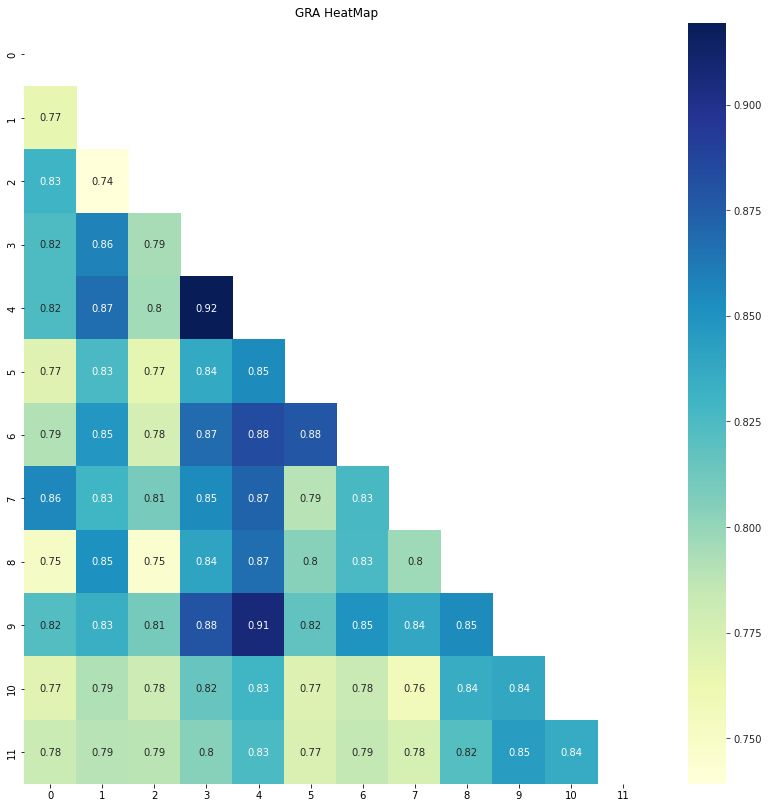

In [ ]:
# 灰色关联结果矩阵可视化
# 灰色关联结果矩阵可视化
import seaborn as sns

def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    
    # 设置展示一半，如果不需要注释掉mask即可
    mask = np.zeros_like(DataFrame)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="YlGnBu",
                    annot=True,
                    mask=mask,
                   )
    plt.show()
    
data_wine_gra = GRA(wine)
ShowGRAHeatMap(data_wine_gra)

## 数据包络分析
https://www.bilibili.com/video/BV1zr4y1H7rW/?spm_id_from=333.788&vd_source=78821760a099022a284c04eeb639e1ae

In [ ]:
pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 3.2 MB/s 


In [ ]:
import gurobipy
import pandas as pd

# 分页显示数据, 设置为 False 不允许分页
pd.set_option('display.expand_frame_repr', False)

# 最多显示的列数, 设置为 None 显示全部列
pd.set_option('display.max_columns', None)

# 最多显示的行数, 设置为 None 显示全部行
pd.set_option('display.max_rows', None)

class DEA(object):
	def __init__(self, DMUs_Name, X, Y, AP=False):
		self.m1, self.m1_name, self.m2, self.m2_name, self.AP = X.shape[1], X.columns.tolist(), Y.shape[1], Y.columns.tolist(), AP
		self.DMUs, self.X, self.Y = gurobipy.multidict({DMU: [X.loc[DMU].tolist(), Y.loc[DMU].tolist()] for DMU in DMUs_Name})
		print(f'DEA(AP={AP}) MODEL RUNING...')

	def __CCR(self):
		for k in self.DMUs:
			MODEL = gurobipy.Model()
			OE, lambdas, s_negitive, s_positive = MODEL.addVar(), MODEL.addVars(self.DMUs),  MODEL.addVars(self.m1), MODEL.addVars(self.m2)
			MODEL.update()
			MODEL.setObjectiveN(OE, index=0, priority=1)
			MODEL.setObjectiveN(-(sum(s_negitive) + sum(s_positive)), index=1, priority=0)
			MODEL.addConstrs(gurobipy.quicksum(lambdas[i] * self.X[i][j] for i in self.DMUs if i != k or not self.AP) + s_negitive[j] == OE * self.X[k][j] for j in range(self.m1))
			MODEL.addConstrs(gurobipy.quicksum(lambdas[i] * self.Y[i][j] for i in self.DMUs if i != k or not self.AP) - s_positive[j] == self.Y[k][j] for j in range(self.m2))
			MODEL.setParam('OutputFlag', 0)
			MODEL.optimize()
			self.Result.at[k, ('效益分析', '综合技术效益(CCR)')] = MODEL.objVal
			self.Result.at[k, ('规模报酬分析', '有效性')] = '非 DEA 有效' if MODEL.objVal < 1 else 'DEA 弱有效' if s_negitive.sum().getValue() + s_positive.sum().getValue() else 'DEA 强有效'
			self.Result.at[k, ('规模报酬分析', '类型')] = '规模报酬固定' if lambdas.sum().getValue() == 1 else '规模报酬递增' if lambdas.sum().getValue() < 1 else '规模报酬递减'
			for m in range(self.m1):
				self.Result.at[k, ('差额变数分析', f'{self.m1_name[m]}')] = s_negitive[m].X
				self.Result.at[k, ('投入冗余率',  f'{self.m1_name[m]}')] = 'N/A' if self.X[k][m] == 0 else s_negitive[m].X / self.X[k][m]
			for m in range(self.m2):
				self.Result.at[k, ('差额变数分析', f'{self.m2_name[m]}')] = s_positive[m].X
				self.Result.at[k, ('产出不足率', f'{self.m2_name[m]}')] = 'N/A' if self.Y[k][m] == 0 else s_positive[m].X / self.Y[k][m]
		return self.Result

	def __BCC(self):
		for k in self.DMUs:
			MODEL = gurobipy.Model()
			TE, lambdas = MODEL.addVar(), MODEL.addVars(self.DMUs)
			MODEL.update()
			MODEL.setObjective(TE, sense=gurobipy.GRB.MINIMIZE)
			MODEL.addConstrs(gurobipy.quicksum(lambdas[i] * self.X[i][j] for i in self.DMUs if i != k or not self.AP) <= TE * self.X[k][j] for j in range(self.m1))
			MODEL.addConstrs(gurobipy.quicksum(lambdas[i] * self.Y[i][j] for i in self.DMUs if i != k or not self.AP) >= self.Y[k][j] for j in range(self.m2))
			MODEL.addConstr(gurobipy.quicksum(lambdas[i] for i in self.DMUs if i != k or not self.AP) == 1)
			MODEL.setParam('OutputFlag', 0)
			MODEL.optimize()
			self.Result.at[k, ('效益分析', '技术效益(BCC)')] = MODEL.objVal if MODEL.status == gurobipy.GRB.Status.OPTIMAL else 'N/A'
		return self.Result

	def dea(self):
		columns_Page = ['效益分析'] * 3 + ['规模报酬分析'] * 2 + ['差额变数分析'] * (self.m1 + self.m2) + ['投入冗余率'] * self.m1 + ['产出不足率'] * self.m2
		columns_Group = ['技术效益(BCC)', '规模效益(CCR/BCC)', '综合技术效益(CCR)','有效性', '类型'] + (self.m1_name + self.m2_name) * 2
		self.Result = pd.DataFrame(index=self.DMUs, columns=[columns_Page, columns_Group])
		self.__CCR()
		self.__BCC()
		self.Result.loc[:, ('效益分析', '规模效益(CCR/BCC)')] = self.Result.loc[:, ('效益分析', '综合技术效益(CCR)')] / self.Result.loc[:,('效益分析', '技术效益(BCC)')]
		return self.Result

	def analysis(self, file_name=None):
		Result = self.dea()
		file_name = 'DEA 数据包络分析报告.xlsx' if file_name is None else f'\\{file_name}.xlsx'
		Result.to_excel(file_name, 'DEA 数据包络分析报告')

In [ ]:
data = pd.DataFrame({1990: [14.40, 0.65, 31.30, 3621.00, 0.00], 1991: [16.90, 0.72, 32.20, 3943.00, 0.09],1992: [15.53, 0.72, 31.87, 4086.67, 0.07], 1993: [15.40, 0.76, 32.23, 4904.67, 0.13],
1994: [14.17, 0.76, 32.40, 6311.67, 0.37], 1995: [13.33, 0.69, 30.77, 8173.33, 0.59],
1996: [12.83, 0.61, 29.23, 10236.00, 0.51], 1997: [13.00, 0.63, 28.20, 12094.33, 0.44],
1998: [13.40, 0.75, 28.80, 13603.33, 0.58], 1999: [14.00, 0.84, 29.10, 14841.00, 1.00]},
index=['政府财政收入占 GDP 的比例/%', '环保投资占 GDP 的比例/%', '每千人科技人员数/人', '人均 GDP/元', '城市环境质量指数']).T

X = data[['政府财政收入占 GDP 的比例/%', '环保投资占 GDP 的比例/%', '每千人科技人员数/人']]
Y = data[['人均 GDP/元', '城市环境质量指数']]

dea = DEA(DMUs_Name=data.index, X=X, Y=Y)
dea.analysis()	# dea 分析并输出表格


DEA(AP=False) MODEL RUNING...
Restricted license - for non-production use only - expires 2023-10-25


In [ ]:
print(dea.dea()) # dea 分析，不输出结果

          效益分析                              规模报酬分析                    差额变数分析                                                           投入冗余率                                产出不足率          
     技术效益(BCC) 规模效益(CCR/BCC) 综合技术效益(CCR)       有效性      类型 政府财政收入占 GDP 的比例/% 环保投资占 GDP 的比例/% 每千人科技人员数/人 人均 GDP/元  城市环境质量指数 政府财政收入占 GDP 的比例/% 环保投资占 GDP 的比例/% 每千人科技人员数/人  人均 GDP/元  城市环境质量指数
1990  0.938462      0.309213    0.290184  非 DEA 有效  规模报酬递增          0.286499             0.0   0.639787      0.0  0.131734          0.019896             0.0    0.02044       0.0       N/A
1991  0.875776      0.325833    0.285357  非 DEA 有效  规模报酬递增          0.586141             0.0        0.0      0.0   0.05389          0.034683             0.0        0.0       0.0  0.598781
1992  0.884845      0.335456    0.296826  非 DEA 有效  规模报酬递增           0.24146             0.0        0.0      0.0  0.084437          0.015548             0.0        0.0       0.0  1.206239
1993  0.874961      0.391463    0.342515  非 DEA 有效  规模报酬递增  

In [ ]:
data = pd.DataFrame({'A': [89.39, 64.3,25.2,223], 'B': [86.25,99,28.2,287],
'C': [108.13,99.6,29.4,317], 'D': [106.38,96,26.4,291],
'E': [62.40,96.2,27.2,295], 'F': [47.19,79.9,25.2,222]},
index=['生均投入/（百元/年）', '非低收入家庭百分比/%', '生均写作得分/分', '生均科技得分/分']).T

In [ ]:
data

,生均投入/（百元/年）,非低收入家庭百分比/%,生均写作得分/分,生均科技得分/分
A,89.39,64.3,25.2,223.0
B,86.25,99.0,28.2,287.0
C,108.13,99.6,29.4,317.0
D,106.38,96.0,26.4,291.0
E,62.40,96.2,27.2,295.0
F,47.19,79.9,25.2,222.0


In [ ]:
X = data[['生均投入/（百元/年）', '非低收入家庭百分比/%']] 
Y = data[['生均写作得分/分', '生均科技得分/分']]

dea = DEA(DMUs_Name=data.index, X=X, Y=Y)
dea.analysis()	# dea 分析并输出表格


DEA(AP=False) MODEL RUNING...


In [ ]:
print(dea.dea()) # 结果看第三列，0.909613那个

       效益分析                              规模报酬分析              差额变数分析                                      投入冗余率                 产出不足率         
  技术效益(BCC) 规模效益(CCR/BCC) 综合技术效益(CCR)       有效性      类型 生均投入/（百元/年） 非低收入家庭百分比/%  生均写作得分/分 生均科技得分/分 生均投入/（百元/年） 非低收入家庭百分比/%  生均写作得分/分 生均科技得分/分
A       1.0           1.0         1.0   DEA 强有效  规模报酬固定         0.0         0.0       0.0      0.0         0.0         0.0       0.0      0.0
B  0.980385      0.927812    0.909613  非 DEA 有效  规模报酬递减         0.0         0.0  0.212143      0.0         0.0         0.0  0.007523      0.0
C       1.0      0.963534    0.963534  非 DEA 有效  规模报酬递减         0.0         0.0  3.908281      0.0         0.0         0.0  0.132935      0.0
D  0.939475      0.973209    0.914305  非 DEA 有效  规模报酬递减         0.0         0.0  4.354592      0.0         0.0         0.0  0.164947      0.0
E       1.0           1.0         1.0   DEA 强有效  规模报酬固定         0.0         0.0       0.0      0.0         0.0         0.0       0.0      0.0
F     

## 模糊综合评价
https://blog.csdn.net/cyj972628089/article/details/107616236


![](https://nimg.ws.126.net/?url=http%3A%2F%2Fdingyue.ws.126.net%2FStSwKbHDEu3uAV6TVFShTrj9icxI8jRByOO6pyVfz7wdR1555577940750compressflag.png&thumbnail=660x2147483647&quality=80&type=jpg)